In [16]:
%pylab inline
import glob
import numpy as np
import sys
import seaborn as sns
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/validation_one_opt/plot_together/'

Populating the interactive namespace from numpy and matplotlib


In [17]:
# PLot cdf of gamma distribution posterior estimates for real data

def main():
    print('Running main')
    
    folder = 't20'
    fig_num = 0
    pers = [2,3,4]
    color_list = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','b','k']
    color_list = ['red','orange','gold','lawngreen','forestgreen','turquoise','aqua','skyblue','blue','blueviolet','purple','deeppink','brown','black']
    motif_dic = {}
    motif_dic[2] = ['AC','AG','AT']
    motif_dic[3] = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT','ACT']
    motif_dic[4] = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG']
    #clrs = sns.color_palette('husl', n_colors=10)
    color_dic={}
    for per in pers:
        i = -1
    
        for motif in motif_dic[per]:
            i = i + 1
            color_dic[motif] = color_list[i]
    
    '''
    for per in pers:
        file_list = glob.glob('./results/results/%s/per_%d_*.txt'%(folder, per) )
        file_list.sort() 
        base_plot = ''
        cum_dic = {}
        for filename in file_list:
            #print(filename)
            fig_num = fig_num + 1

            results_file = open(filename, 'r')
            lines = results_file.readlines()
            line = lines[9]
            info = line.strip().split(': ')
            num_acc = int(info[1])
            line = lines[1]
            info = line.strip().split(': ')
            num_loci = int(info[1])
            if num_acc > 0 and num_loci >= 10:
         
                line = lines[2]
                info = line.strip().split(': ')
                motif = info[2]
                motif = motif.strip().split(' ')
                motif = motif[0]
                opt_allele = int(info[3])
                if motif != '1.0' and motif != '0.0':
                    line = lines[11]
                    info = line.strip().split(',')
                    k = float(info[0])
                    theta = float(info[1])

                    #print(motif)

                    s = [] # List of s values drawn from gamma distribution
                    num_sims = 10000
                    for i in range(0, num_sims):
                        s_val = np.random.gamma(k, theta)
                        if s_val > 0.1:
                            s_val = 0.1

                        s.append(s_val)
                    
                    bins_list = [0]
                    exponents = [10**-5, 10**-4, 10**-3, 10**-2]
                    for j in exponents:
                        for i in np.arange(1,10,0.1):
                            bins_list.append(i*j)
                            
                    bins_list.append(0.1)
                    bins_list.append(1)
                    
                    values, base = np.histogram(s, bins=bins_list)# [0,10**-5,10**-4,10**-3,10**-2,10**-1,1]#[0,10**-5,10**-4,10**-3,10**-2,10**-1,1]
                    
                    cumulative = np.cumsum(values)
                    
                    cum_dic[(motif, opt_allele)] = cumulative
                    base_plot = base
        #print(cum_dic)      
        # Plot CDF
        color_num = -1
        fig_num = fig_num + 1
        plt.figure(fig_num)
        for elem in cum_dic:
            color_num = color_num + 1
            plt.plot(base_plot[:-1], cum_dic[elem], label = elem, color=color_dic[elem[0]], linewidth = 0.5)
            
        plt.xlim(10**-5, 0.1)
        plt.xscale('log')
        plt.title('Period %d'%(per))
        plt.xlabel('s')
        plt.legend()
        
        yticks([0, 2000, 4000, 6000, 8000, 10000], ['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        plt.ylabel('Cumulative Frequency')
        plt.show()
        
    '''
    color_dic = {}
    color_dic[('2', '0.0')] = 'C0'
    color_dic[('3', '0.0')] = 'C1'
    color_dic[('3', '1.0')] = 'C2'
    color_dic[('4', '0.0')] = 'C3'
    # Plot noncoding v coding loci
    file_list = glob.glob('./results/results/%s/per_*_7_*.txt'%(folder))
    file_list.sort() 
    base_plot = ''
    cum_dic = {}
    for filename in file_list:
        fig_num = fig_num + 1
        per = filename[26]
        #print(filename)
        #print(per)
        results_file = open(filename, 'r')
        lines = results_file.readlines()
        line = lines[9]
        info = line.strip().split(': ')
        num_acc = int(info[1])
        line = lines[1]
        info = line.strip().split(': ')
        num_loci = int(info[1])
        if num_acc > 0 and num_loci >= 10:
            line = lines[2]
            info = line.strip().split(': ')
            motif = info[2]
            motif = motif.strip().split(' ')
            motif = motif[0]
            opt_allele = info[3]
            line = lines[11]
            info = line.strip().split(',')
            k = float(info[0])
            theta = float(info[1])

            #print(motif)

            s = [] # List of s values drawn from gamma distribution
            num_sims = 10000
            for i in range(0, num_sims):
                s_val = np.random.gamma(k, theta)
                if s_val > 0.1:
                    s_val = 0.1

                s.append(s_val)
                    
            bins_list = [0]
            exponents = [10**-5, 10**-4, 10**-3, 10**-2]
            for j in exponents:
                for i in np.arange(1,10,0.1):
                    bins_list.append(i*j)
                            
            bins_list.append(0.1)
            bins_list.append(1)
                    
            values, base = np.histogram(s, bins=bins_list)# [0,10**-5,10**-4,10**-3,10**-2,10**-1,1]#[0,10**-5,10**-4,10**-3,10**-2,10**-1,1]
                    
            cumulative = np.cumsum(values)
            if len(opt_allele) == 1:
                opt_allele = '0'+opt_allele
            cum_dic[(per, motif, opt_allele)] = cumulative
            base_plot = base
                   
    # Plot CDF
    color_num = -1
    
    
    to_plots = [('2', '0.0'), ('3', '0.0') , ('3', '1.0'), ('4','0.0')]
    for to_plot in to_plots:
        fig_num = fig_num + 1
        plt.figure(fig_num)
        i = -1
        for elem in cum_dic:
            
            if elem[0] == to_plot[0] and elem[1] == to_plot[1]:

                color_num = color_num + 1
                if elem[1] == '1.0':
                    lab = 'coding'
                else:
                    lab = 'noncoding'
                if elem[2] != '00':
                    i = i + 1
                    print(i)
                    plt.plot(base_plot[:-1], cum_dic[elem], label = 'Per ' + elem[0] + ' ' + lab + ' Opt ' + str(elem[2]), color=color_list[i], linewidth = 1) #color_dic[(elem[0], elem[1])]

                else:
                    plt.plot(base_plot[:-1], cum_dic[elem], label = 'Per ' + elem[0] + ' all opt',color=color_dic[(elem[0], elem[1])], linewidth = 3)

        plt.xlim(10**-5, 0.1)
        plt.xscale('log')
        plt.title('Distribution of s values: joint method')
        plt.xlabel('s')
        #plt.legend(bbox_to_anchor=(1.01, 1.01))
        plt.legend() 

        yticks([0, 2000, 4000, 6000, 8000, 10000], ['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        plt.ylabel('Cumulative Frequency')
        #plt.show()

Running main
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
0
1
2
CPU times: user 2.74 s, sys: 30.9 ms, total: 2.78 s
Wall time: 8.83 s


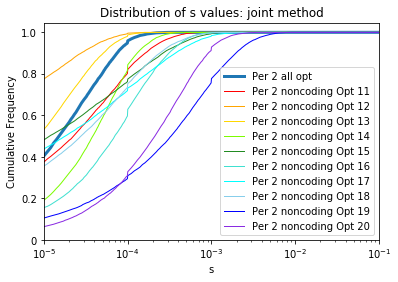

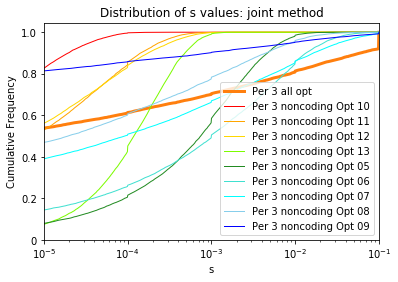

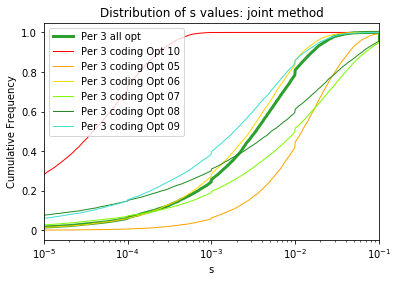

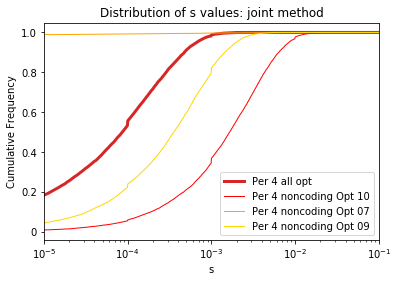

In [18]:
%%time
if __name__ == '__main__':
    main()